## Polynomial approximation: Equally spaced points vs. Chebyshev points

Suppose we want to approximate $f(x)$ with a polynomial $$p(x)=a_0 + a_1 x + \cdots a_n x^n$$  for $x\in [-1,1]$.

The simplest thing to try is to take $N$ equally spaced points $x_k$, $k=1, \ldots, N$ and solve the system of linear equations
$$
p(x_k) = f(x_k)\,, \quad k=1,\ldots,N
$$
for $a_0,a_1, \ldots a_N$. 


The equations can be written $A a = b$ where $A$ is the Vandermonde matrix
$$
A=\begin{bmatrix}
1& x_0& x_0^2 &x_0^3 & \ldots & x_0^N\\1& x_1& x_1^2 &x_1^3 & \ldots & x_1^N\\ &&&\vdots&&\\1& x_2& x_2^2 &x_2^3 & \ldots & x_0^N\\
\end{bmatrix}
$$

$a$ contains the coeffcients of the polynomial
$$ 
a =\begin{bmatrix}a_0\\a_1\\\vdots\\a_N\\\end{bmatrix}
$$

and

$$ 
b =\begin{bmatrix}f(x_0)\\f(x_1)\\\vdots \\f(x_N)\\\end{bmatrix}
$$

We can solve these equations for $a$ and compare the resulting polynomial $p(x)$ with $f(x)$.

It turns out, however, that it may be better to use points that are not equally spaced. In some sense (made precise [here](https://people.maths.ox.ac.uk/trefethen/ATAP/) ) the points $x_k = \cos(\frac{2k-1}{2N}\pi)$, $k=1,\ldots, N$ (called Chebyshev nodes) are optimal.

### Homework question: 

**The following pieces of python code compute and graph interpolating polynomials for $N$ equally spaced points (xe) and for $N$ Chebyshev points (xc). Run this code for various values of $N$ and describe what happens when $N$ increases. You may want to compare the condition numbers of the Vandermonde matrices for the equally spaced case $AE$ and the Chebyshev case. You can also try changing $f$. Your aim should be to decide whether (at least in certain situations) it is better to take the Chebyshev points**

Here is code for the equally spaced case:

1104808.5293844922


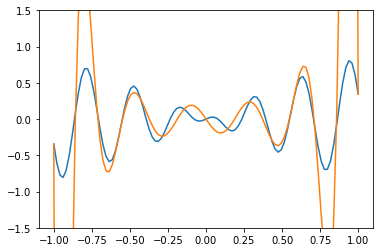

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#define f
def f(x):
    return np.sin(x) * np.cos(20*x)

#plot f
xx=np.linspace(-1.0,1.0, num=100) 
plt.plot(xx,f(xx))
plt.axis([-1.1,1.1,-1.5,1.5])

N=15

#set up the equations for the polynomial coefficients ae for equally spaced points and solve
xe=np.linspace(-1,1,N)
AE=np.vander(xe)
fe=f(xe)
ae=la.solve(AE,fe)

#plot the polynomial
pe=np.polyval(ae,xx)
plt.plot(xx,pe)

#condition number
print(np.linalg.cond(AE))



Here is the code for the Chebyshev case

1104808.5293844922


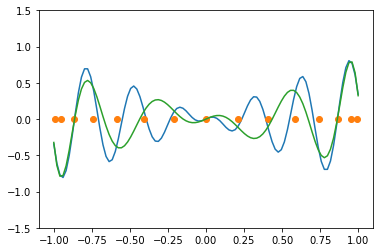

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#define f
def f(x):
    return np.sin(x) * np.cos(20*x)

#plot f
xx=np.linspace(-1.0,1.0, num=100) 
plt.plot(xx,f(xx))
plt.axis([-1.1,1.1,-1.5,1.5])

N=15

#set up the equations for the polynomial coefficients ae for equally spaced points and solve
k=np.arange(1,N+1)
xc=np.cos(np.pi*(2*k-1)/(2*N))
plt.plot(xc,np.zeros(N),"o")
AC=np.vander(xc)
fc=f(xc)
ac=la.solve(AC,fc)

#plot the polynomial
pc=np.polyval(ac,xx)
plt.plot(xx,pc)



#condition number
print(np.linalg.cond(AE))
